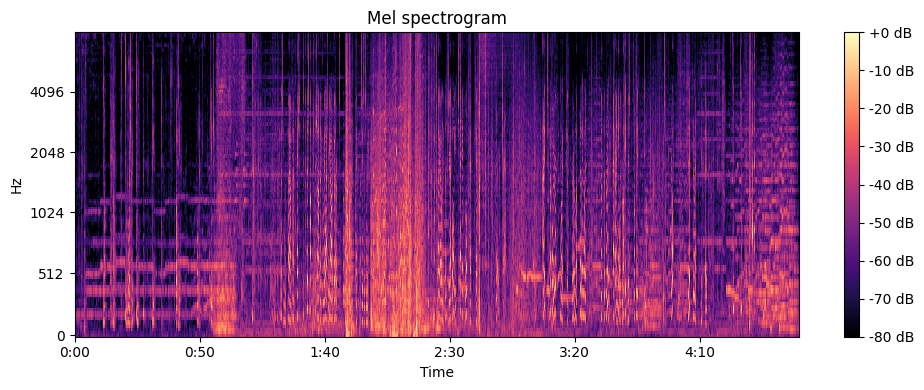

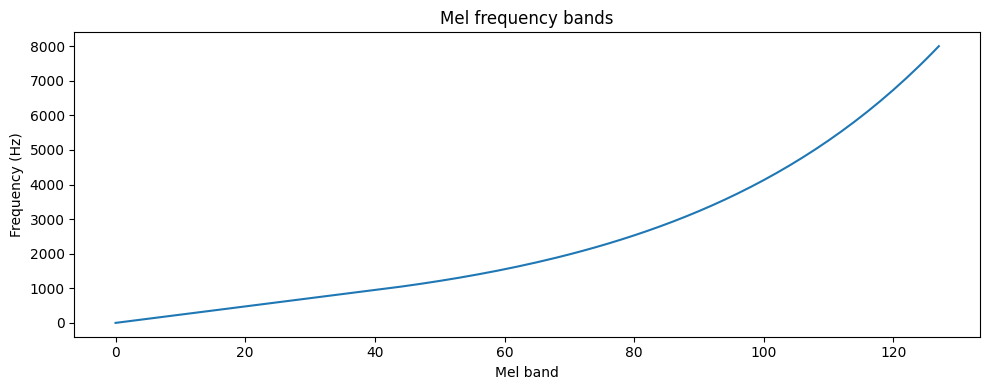

<class 'numpy.ndarray'>
Entropy of Mel spectrogram: 11.523097


In [57]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy

# Load audio file
audio_file = "/Users/samhitha/Documents/USC MsCS/Third Sem/Multimedia/project/Ready_Player_One_rgb/InputAudio.wav"
y, sr = librosa.load(audio_file, sr=None)

# Compute Mel spectrogram
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)

# Convert power to decibel (dB) scale
S_dB = librosa.power_to_db(S, ref=np.max)

# Display Mel spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr, fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()
plt.show()

# Compute Mel frequency bands
mels = librosa.mel_frequencies(n_mels=128, fmax=8000)
plt.figure(figsize=(10, 4))
plt.plot(mels)
plt.xlabel('Mel band')
plt.ylabel('Frequency (Hz)')
plt.title('Mel frequency bands')
plt.tight_layout()
plt.show()

print(type(S))
# Compute entropy of Mel spectrogram
mel_entropy = entropy(S.flatten())
print('Entropy of Mel spectrogram:', mel_entropy)


## Spectral centroids

In [27]:
import librosa

# Load audio file
audio_file = "/Users/samhitha/Documents/USC MsCS/Third Sem/Multimedia/project/Ready_Player_One_rgb/InputAudio.wav"
y, sr = librosa.load(audio_file)

# Define the window size and hop length (in samples)
win_size = 1024
hop_length = 512

# Calculate the short-term Fourier transform of the audio signal
stft = librosa.stft(y)

# Convert the magnitude spectrogram to decibels
spectrogram = librosa.amplitude_to_db(abs(stft))
# Calculate the spectral centroid of each frame
spectral_centroids = librosa.feature.spectral_centroid(S=np.abs(stft) )



In [45]:
audio_file = "/Users/samhitha/Documents/USC MsCS/Third Sem/Multimedia/project/Ready_Player_One_rgb/InputAudio.wav"
y, sr = librosa.load(audio_file)

k, m = divmod(len(y), 5)
arr = [y[i*k+min(i, m):(i+1)*k+min(i+1, m)] for i in range(len(y))]

S, phase = librosa.magphase(librosa.stft(y=y))
cent = librosa.feature.spectral_centroid(S=S)

In [41]:
arr

<generator object <genexpr> at 0x299f0a270>

[Text(0.5, 1.0, 'log Power spectrogram')]

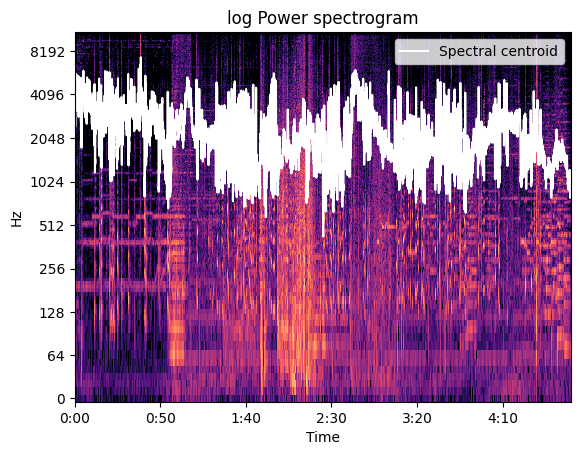

In [46]:
import matplotlib.pyplot as plt
times = librosa.times_like(cent)
fig, ax = plt.subplots()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.plot(times, cent.T, label='Spectral centroid', color='w')
ax.legend(loc='upper right')
ax.set(title='log Power spectrogram')

## Audio segmentation and entropy

In [95]:
# Load audio file
audio_file = "/Users/samhitha/Documents/USC MsCS/Third Sem/Multimedia/project/Ready_Player_One_rgb/InputAudio.wav"
y, sr = librosa.load(audio_file, sr=None)

segment_dur_secs = 2
segment_length = sr * segment_dur_secs

split = []    
for s in range(0, len(y),segment_length):
    t = y[s: s + segment_length]
    split.append(t)

In [96]:
from scipy.stats import entropy
entropy_list=[]
for segment in split:
     # Compute Mel spectrogram
    S = librosa.feature.melspectrogram(y=segment, sr= sr, n_mels=128,fmax=8000)
    # Compute entropy of Mel spectrogram
    S_f = S.flatten()
    mel_entropy = entropy(S_f)
    entropy_list.append(mel_entropy)


In [97]:
diff= []
for i in range(1,len(entropy_list)):
    diff.append(abs(entropy_list[i-1] - entropy_list[i]))

<BarContainer object of 144 artists>

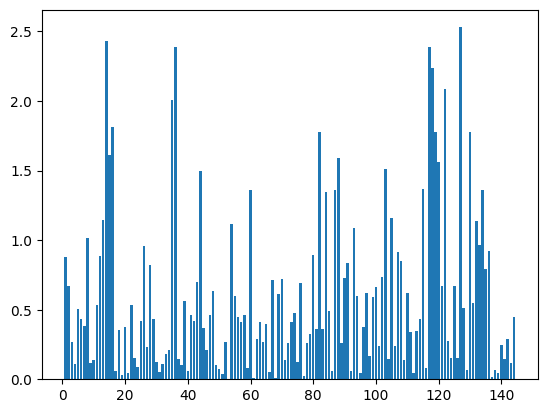

In [98]:
import matplotlib.pyplot as plt

plt.bar(np.arange(1,len(diff)+1),diff)

In [94]:
for i in range(len(diff)):
    print(i, diff[i])

0 0.03608036
1 0.74432087
2 0.92688227
3 1.5301294
4 2.1321201
5 0.30149412
6 1.9150677
7 1.089994
8 0.42358875
9 0.6390948
10 1.767355
11 0.13643646
12 0.0900774
13 2.3675752
14 2.2100291
15 0.76632357
16 0.38290453
17 0.32366562
18 1.0061836
19 0.09704971
20 0.16347027
21 0.23558426
22 0.11183596
23 1.3679128
24 0.62873745
25 0.6056881
26 0.96170807
27 0.11418533
28 0.16296959
29 0.70464706
30 0.20507431
31 0.13088894
32 0.09756756
33 0.7612777
34 0.029697895
35 0.12517118
36 0.61190605
37 0.28839588
38 0.06251001
39 0.36715126
40 0.86372757
41 1.2610888
42 0.24712324
43 0.46094704
44 0.08150673
45 1.5299053
46 2.1630445
47 2.2155213
48 1.7586198
49 0.40039682
50 2.3391504
51 2.45617
52 0.93093204
53 0.6775985
54 1.5605683
55 0.34332085
56 0.054566383


In [100]:
diff2= []
for i in range(1,len(diff)):
    diff2.append(abs(diff[i-1] - diff[i]))

In [101]:
np.std(diff2)

0.5097222

In [111]:
thresh = np.percentile(diff2, 95)

In [112]:
for i in range(len(diff2)):
    if(diff2[i]> thresh):
        print(i, diff2[i])

15 1.757441
33 1.7918239
35 2.2427897
115 2.3064928
121 1.8079166
125 2.377882
126 2.017418
128 1.7097921
